In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_hdf("../hdf/train_numeric.hdf")

In [3]:
response = pd.read_hdf("../hdf/train_response.hdf")

In [4]:
tmp = pd.concat([train, response], axis=1)

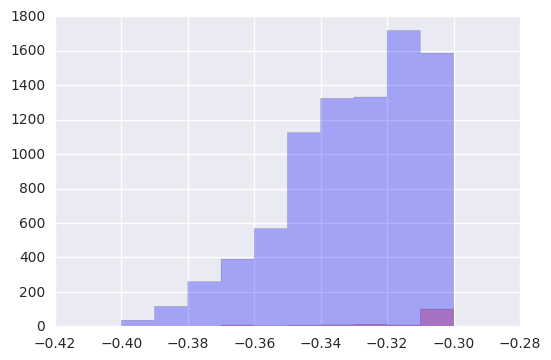

In [12]:
plt.figure()
x = tmp[tmp["Response"] == 1.0]["L1_S24_F1844"].values
plt.hist(
    x[~np.isnan(x)],
    bins=10,
    alpha=0.3,
    histtype='stepfilled',
    color='r',
    range=(-0.4, -0.3))
x = tmp[tmp["Response"] == 0.0]["L1_S24_F1844"].values
plt.hist(
    x[~np.isnan(x)],
    bins=10,
    alpha=0.3,
    histtype='stepfilled',
    color='b',
    range=(-0.4, -0.3))
plt.show()

In [8]:
train = pd.read_hdf("../hdf/test_numeric.hdf")

In [9]:
train = train[["L1_S24_F1844"]]
train = train.where((-0.31 <= train) & (train <= -0.29), 0.0)
train = train.where(train == 0.0, 1.0)
train.rename(
    columns={
        "L1_S24_F1844": "L1_S24_F1844_-0.31_-0.29"
    }, inplace=True)
train.to_hdf("../hdf/test_numeric_L1_S24_F1844_extract.hdf", "df", mode="w")